1) Vectors

A vector is a quantity with magnitude and direction, with components expressed in terms of more than one coordinate, usually expressed in terms of the mutually orthogonal coordinate vectors $(\mathbf i,\ \mathbf j,\ \mathbf k)$ of the cartesian coordinate system, often expressed with an $x$, $y$ and $z$ axis. This can also be defined as $\mathbb R^3$ or the domain of 3 dimensional real numbers, or  as $\mathbb E^3$ to define 3 dimensional Euclidean space. 
   
$$\mathbf a = a_1 \mathbf i + a_2\mathbf j + a_3\mathbf k$$
   
can be described formaly as $\mathbf a \in \mathbb E^3$. The expression above is a vector of magnitude $a_1$ in the $x$ direction, $a_2$ in the $y$ direction and $a_3$ in the z direction.

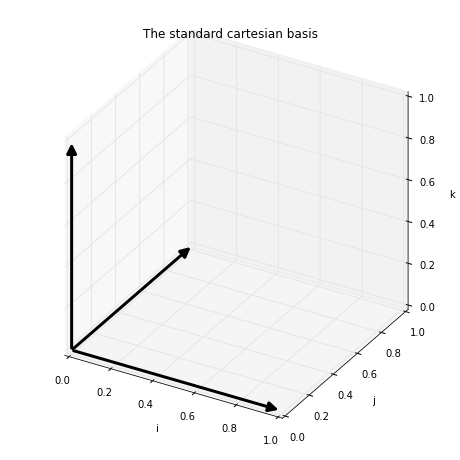

In [67]:
# challenge ...
# plot the 3 axis vectors with appropriate labels using matplotlib!

import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
#from matplotlib import rc



# no luck with latex rendering this time ...
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

# http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
# posted this fancy arrow object
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a) 

ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k')
plt.title('The standard cartesian basis')

 A vector that describes *any point* in space is often expressed as
   
   $$\mathbf r = x \mathbf i + y\mathbf j + z\mathbf k$$
   
So a vector can represent a point or an arrow. A vector may also be expressed as a tuple $(x,y,z)$ or in matrix form, and in this case it defaults to a column by convention. 

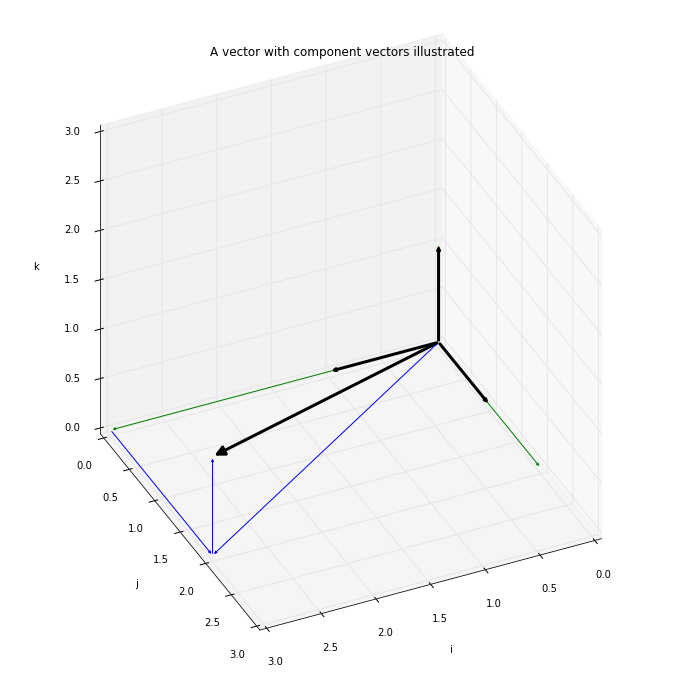

In [66]:
mpl.rcParams['legend.fontsize'] = 10


#plt.figure(figsize=(30,30))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
#from mpl_toolkits.mplot3d import proj3d
#import numpy as numpy


#proj3d.persp_transformation = orthogonal_proj
a = Arrow3D([0, 3], [0, 2], [0, 1], mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 3], [0, 0], [0, 0], mutation_scale=5, lw=1, arrowstyle="-|>", color="g")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 2], [0, 0], mutation_scale=5, lw=1, arrowstyle="-|>", color="g")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=5, lw=1, arrowstyle="-|>", color="g")
ax.add_artist(a)
a = Arrow3D([3, 3], [0, 2], [0, 0], mutation_scale=5, lw=1, arrowstyle="-|>", color="b")
ax.add_artist(a)
a = Arrow3D([0, 3], [0, 2], [0, 0], mutation_scale=5, lw=1, arrowstyle="-|>", color="b")
ax.add_artist(a)
a = Arrow3D([3, 3], [2, 2], [0, 1], mutation_scale=5, lw=1, arrowstyle="-|>", color="b")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=5, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=5, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=5, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a) 

ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 3)

ax.view_init(35, 65)
plt.title('A vector with component vectors illustrated')

The magnitude of a vector is given by the pythagorean formula in 3 dimensions
   
$$ |\mathbf r| = \sqrt{ x^2 + y^2 + z^2 } = ( x^2 + y^2 + z^2 )^{(1/2)} $$

And so a unit vector in the direction of $\mathbf r$ is 
   
   $$\hat{\mathbf r} = \frac{\mathbf r}{|\mathbf r|} $$
   
The sum of two vectors $\mathbf a + \mathbf b$ is the component-wise sum 
   
   $$ \mathbf a + \mathbf b = (a_1+b_1) \mathbf i + (a_2+b_2)\mathbf j + (a_3+b_3)\mathbf k $$
   
and the rules of ordinary algebra of real numbers applies to each component. The sum is commutative. To calculate a direction vector from $\mathbf a$ to $\mathbf b$ you form the difference, $\mathbf v = \mathbf b - \mathbf a$.

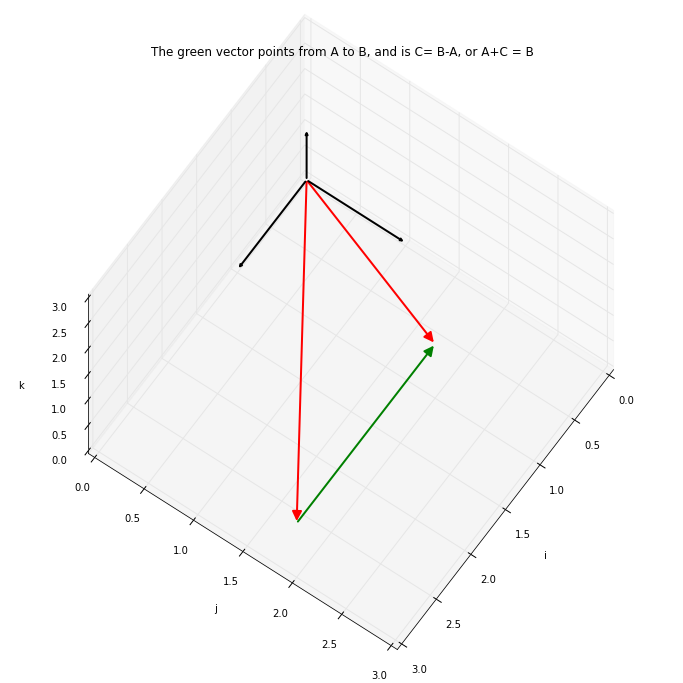

In [97]:
mpl.rcParams['legend.fontsize'] = 10


#plt.figure(figsize=(30,30))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
#from mpl_toolkits.mplot3d import proj3d
#import numpy as numpy


#proj3d.persp_transformation = orthogonal_proj
a = Arrow3D([0, 3], [0, 2], [0, 1], mutation_scale=20, lw=2, arrowstyle="-|>", color="r")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 2], [0, 1], mutation_scale=20, lw=2, arrowstyle="-|>", color="r")
ax.add_artist(a)
a = Arrow3D([3, 1], [2, 2], [1, 1], mutation_scale=20, lw=2, arrowstyle="-|>", color="g")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
ax.add_artist(a) 

ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 3)

ax.view_init(65, 35)

plt.title('The green vector points from A to B, and is C= B-A, or A+C = B')


   
Mupltiplication of a vector by a scalar is the component-wise multiplication of the vector.
$$ k\mathbf a = ka_1 \mathbf i + ka_2\mathbf j + ka_3\mathbf k$$

and $ k(\mathbf a + \mathbf b) = k \mathbf a + k\mathbf b$, and $(k+n)\mathbf a = k\mathbf a + n\mathbf a$

The scalar product or dot product of two vectors $a$ and $b$ is denoted by $ \mathbf{a}\cdot\mathbf{b} $ returns a scalar (results in or evaluates to a scalar) and is defined as 

$$\mathbf{a}\cdot\mathbf{b} = |\mathbf{a}||\mathbf{b}|\cos(\theta)\quad  (0 \leq \theta \leq \pi)\quad $$ 
   
where $\theta$ is the angle between the vectors and

$$\mathbf{a}\cdot\mathbf{b} = a_1\ b_1+ a_2\ b_2+ a_3\ b_3$$

Therefore
   
   $$a_1\ b_1+ a_2\ b_2+ a_3\ b_3= |\mathbf{a}||\mathbf{b}|\cos(\theta)$$
   
and clearly if $\mathbf a\cdot \mathbf b=0$ then the vectors are perpendicular. 
   
and magnitude 

   $$|\mathbf r| = \sqrt{\mathbf r\cdot \mathbf r}$$
   
implies $|\mathbf r|^2 = \mathbf r\cdot \mathbf r$

### Plane Equation

For a vector $\mathbf r$ and a plane $P$ with normal vector $n$ the standard equation of the plane is000
   
$$ ax + by + cz = d $$ 
   
the coeffients $a,b,c$ are the components of the normal vector, $\mathbf n$ and for a scalar distance $d$, the plane is the locus of all points $\mathbf r = (x,y,z)$ such that  ...

$$ \mathbf r \cdot \mathbf n = d$$ 

If the endpoints of two vectors lie in a plane, and their equation is 

$(\mathbf r_2 - \mathbf r)\cdot \mathbf n = 0$

   
since the vector $(\mathbf r_2 - \mathbf r)$ lies in the plane and is perpendicular to the normal vector $\mathbf n $ of the plane.
 

Laws
<table>
<tr>
<td>1)</td>
<td>$ \quad\mathbf{a}\cdot\mathbf{b} = \mathbf{b}\cdot\mathbf{a}\quad\   $</td>
<td>commutative law for dot products</td>
</tr>
<tr>
<td>2)</td>
<td>$\quad\mathbf{a}\cdot(\mathbf{b}+\mathbf{c}) = \mathbf{a}\cdot\mathbf{b} + \mathbf{a}\cdot\mathbf{c}\quad\quad\quad\quad $</td>
<td>Distributive Law </td>
</tr>
<tr>
<td>3)</td>
<td>$\quad m(\mathbf{a}\cdot\mathbf{b}) = (m\mathbf{a})\cdot\mathbf{b} = \mathbf{a}\cdot(m\mathbf{b}) = (\mathbf{a}\cdot\mathbf{b})m \quad\quad$</td>
<td>when m is a scalar</td>
</tr>
<tr>
<td>4)</td>
<td>$ \quad\mathbf{i}\cdot\mathbf{i} = \mathbf{j}\cdot\mathbf{j} = \mathbf{k}\cdot\mathbf{k} = 1 \\   \quad\mathbf{i}\cdot\mathbf{j} = \mathbf{j}\cdot\mathbf{k} = \mathbf{k}\cdot\mathbf{i} = 0\quad\quad $</td>
<td></td>
</tr>
<tr>
<td>5)</td>
<td>if $\quad \mathbf{a}= a_1 \mathbf{i} + a_2 \mathbf{j} + a_3 \mathbf{k} ,\quad\\ \mathbf{b} = b_1 \mathbf{i} + b_2 \mathbf{j} + b_3 \mathbf{k}\quad\quad\quad\quad $ </td>
<td>then
    $\qquad \mathbf{a}\cdot\mathbf{b} = a_1 b_1 + a_2 b_2 + a_3 b_3\\ 
    \qquad \mathbf{a}\cdot\mathbf{a} = a_1^2 + a_2^2 + a_3^2 $</td>
</tr>
<tr>
<td>6)</td>
<td>if $\quad a.b = 0\quad\quad\quad\quad $ </td>
<td>and <b>a</b> and <b>b</b> are not null vectors then <b>a</b> and <b>b</b> are perpendicular</td>
</tr>
</table>

In [55]:
from sympy.vector import CoordSysCartesian

In [56]:
N = CoordSysCartesian('N')

In [3]:
A = 2*N.i + 3 * N.j + N.k

In [4]:
B = 3*N.i + N.j + 4*N.k 

In [6]:
A+B

5*N.i + 4*N.j + 5*N.k

In [7]:
A.dot(B)

13

In [8]:
A.dot(B)==B.dot(A)

True

In [9]:
C = N.i + 7*N.j + 2 *N.k

In [10]:
A.dot(B+C)==A.dot(B) + A.dot(C)

True

In [12]:
5 * A.dot(B) == A.dot(5*B)

True

In [13]:
N.i.dot(N.j)

0

In [14]:
N.i.dot(N.i)

1

The projection of a vector $\mathbf a$ onto a vector $\mathbf b$ is
   
$$ \frac{ \mathbf a \cdot \mathbf b}{|\mathbf b|} $$ and can be denoted $P_{\mathbf a}(\mathbf b)$

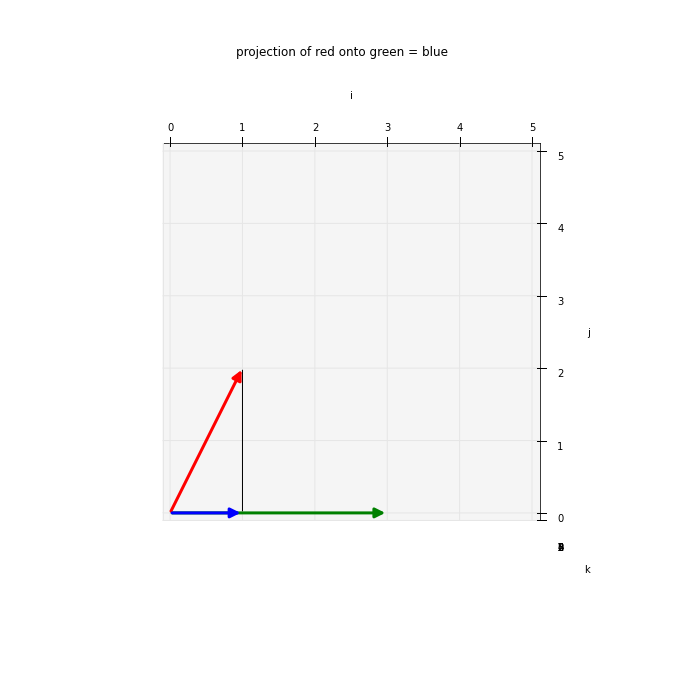

In [96]:
mpl.rcParams['legend.fontsize'] = 10

#plt.figure(figsize=(30,30))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
#from mpl_toolkits.mplot3d import proj3d
#import numpy as numpy

#proj3d.persp_transformation = orthogonal_proj
a = Arrow3D([0, 3], [0, 0], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)
a = Arrow3D([1, 1], [0, 2], [0, 0], mutation_scale=20, lw=1, arrowstyle="-", color="k")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="b")
ax.add_artist(a)

ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(0, 5)

ax.view_init(90, 270)

plt.title('projection of red onto green = blue')

The Cross or Vector Product of <b>a</b> and <b>b</b> is a vector 

$\mathbf{c} =\mathbf{a }\times \mathbf{b}. $

The magnitude of $ \mathbf{a }\times \mathbf{b} $ is defined as the product of the magnitudes of <b>a</b> and <b>b</b> and the sin of the angle between them. The direction of <b>a</b> and <b>b</b> is perpendicular to the place of <b>a</b> and <b>b</b> such that <b>a, b, c </b> form a right handed system - if you are looking at the plane, $\mathbf a$ is horizontal in the positive sense, $\mathbf b$ is vertical in the positive sense then $\mathbf c$ points towards you out of the page.

$$   \mathbf{a }\times \mathbf{b} = |\mathbf{a}  | | \mathbf{b}  |\sin \theta \mathbf{u}  $$

where <b>u</b> is a unit vector indicating the direction of $  \mathbf{a }\times \mathbf{b}  $. If <b>a</b>=<b>b</b> or <b>a</b> is parallel to <b>b</b> then $ \sin \theta =0 $ and $ \mathbf{a }\times \mathbf{b} = 0  $ ... also

$$ \mathbf{a }\times \mathbf{b} = \begin{vmatrix} \mathbf i&\mathbf j &\mathbf k \\ a_1& a_2 & a_3 \\ b_1 & b_2 & b_3 \end{vmatrix}$$
   
therefore
   
$$\mathbf{a }\times \mathbf{b}=\begin{vmatrix} a_2&a_3 \\ b_2& b_3 \end{vmatrix}\mathbf i-\begin{vmatrix} a_1 & a_3 \\ b_1& b_3 \end{vmatrix}\mathbf j+\begin{vmatrix} a_1&a_2 \\ b_1& b_2 \end{vmatrix}\mathbf k $$
   
etc
  $$ \mathbf{a }\times \mathbf{b} = (a_2 b_3 - a_3 b_2)\mathbf i- (a_1 b_3 - a_3 b_1)\mathbf j + (a_1 b_2 - a_2 b_1)\mathbf k$$

where <b>u</b> is a unit vector indicating the direction of $  \mathbf{a }\times \mathbf{b}  $. If <b>a</b>=<b>b</b> or <b>a</b> is parallel to <b>b</b> then $ \sin \theta =0 $ and $ \mathbf{a }\times \mathbf{b} = 0  $
   
The magnitude of the cross product $ \mathbf{a }\times \mathbf{b}$ is the area of the paralleogram with sides $a$ and $b$.

 <h3>Laws</h3> 
 
 <table>
     <tr>
         <td>1)</td>
         <td>$ \mathbf{a }\times \mathbf{b} = -\mathbf{b }\times \mathbf{a} $</td>
         <td>Commutative law fails </td>
     </tr>
     <tr>
         <td>2)</td>
         <td>$ \mathbf{a }\times (\mathbf{b}+\mathbf{c} )= \mathbf{a }\times \mathbf{b} +\mathbf{a }\times \mathbf{c} $ 
         </td>
         <td>Distributive law </td>
     </tr>
     <tr>
         <td>3)</td>
         <td> $ m(\mathbf{a }\times \mathbf{b} )=m\mathbf{a }\times \mathbf{b} =\mathbf{a }\times m \mathbf{b} =(\mathbf{a }\times \mathbf{b} )m  $ </td>
         <td>where m is a scalar</td>
     </tr>
     <tr>
         <td>4)</td>
         <td>$  \mathbf{i }\times \mathbf{i} =\mathbf{j }\times \mathbf{j}=\mathbf{k }\times \mathbf{k}=0;$<br> $\mathbf{i }\times \mathbf{j} =\mathbf k,\quad \mathbf{j }\times \mathbf{k} =\mathbf i,\quad \mathbf{k}\times \mathbf{i} =\mathbf j $ </td>
         <td></td>
     </tr>
     <tr>
         <td>4)</td>
         <td>The magnitude of $ \mathbf{a }\times \mathbf{b} $ is the same as a</td>
         <td>area of  parallelogram with sides <b>a</b> and <b>b</b></td>
     </tr>
          <tr>
         <td>5)</td>
         <td>$ \mathbf{a }\times \mathbf{b} = 0  $ </td>
         <td> <b>a</b> and <b>b</b> are not null vectors then <b>a</b> and <b>b</b> are parallel<br></td>
     </tr>
 </table>


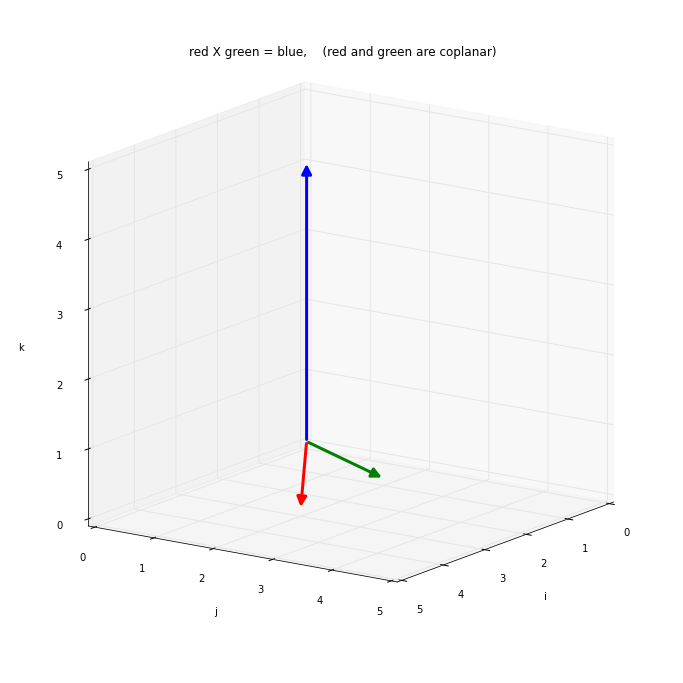

In [72]:
mpl.rcParams['legend.fontsize'] = 10


#plt.figure(figsize=(30,30))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
#from mpl_toolkits.mplot3d import proj3d
#import numpy as numpy


#proj3d.persp_transformation = orthogonal_proj
a = Arrow3D([0, 3], [0, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 0], [0, 4], mutation_scale=20, lw=3, arrowstyle="-|>", color="b")
ax.add_artist(a)




ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(0, 5)

ax.view_init(15, 35)

plt.title('red X green = blue,    (red and green are coplanar)')

In [15]:
A.cross(B)

11*N.i + (-5)*N.j + (-7)*N.k

In [17]:
from sympy import symbols
a1,a2,a3=symbols('a1 a2 a3')

In [18]:
a=a1*N.i+a2*N.j+a3*N.k

In [19]:
b1,b2,b3=symbols('b1 b2 b3')

In [22]:
b=b1*N.i + b2*N.j + b3 * N.k

In [23]:
a.dot(b)

a1*b1 + a2*b2 + a3*b3

In [24]:
a.cross(b)

(a2*b3 - a3*b2)*N.i + (-a1*b3 + a3*b1)*N.j + (a1*b2 - a2*b1)*N.k

In [25]:
m=symbols('m')

In [26]:
m*a

a1*m*N.i + a2*m*N.j + a3*m*N.k

In [27]:
m*a.dot(b)

m*(a1*b1 + a2*b2 + a3*b3)

In [28]:
a.dot(b*m)

a1*b1*m + a2*b2*m + a3*b3*m

In [29]:
N.i.cross(N.j)

N.k

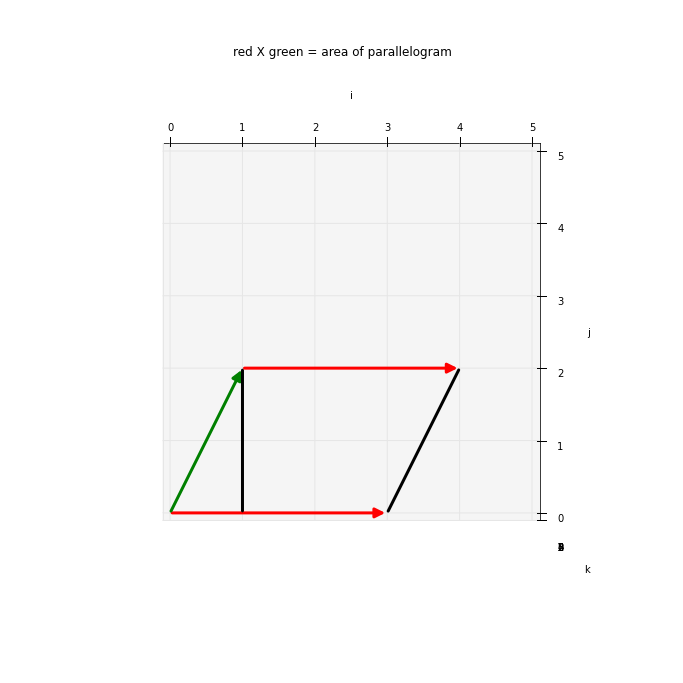

In [91]:
mpl.rcParams['legend.fontsize'] = 10


#plt.figure(figsize=(30,30))
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
#from mpl_toolkits.mplot3d import proj3d
#import numpy as numpy


#proj3d.persp_transformation = orthogonal_proj
a = Arrow3D([0, 3], [0, 0], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
ax.add_artist(a)
a = Arrow3D([1, 1], [0, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="-", color="k")
ax.add_artist(a)
a = Arrow3D([3, 4], [0, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="-", color="k")
ax.add_artist(a)
a = Arrow3D([1, 4], [2, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)



ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(0, 5)

ax.view_init(90, 270)

plt.title('red X green = area of parallelogram')

Triple Products

Dot and cross products combination laws

<b>1)</b> $ (\mathbf a \cdot \mathbf b ) \mathbf c\neq \mathbf a (\mathbf b .\mathbf c) $
   
<b>2)</b> $\mathbf a\cdot(\mathbf b \times \mathbf c)=\mathbf b\cdot(\mathbf c \times \mathbf a)=\mathbf c\cdot(\mathbf a \times \mathbf b)=$ volume of parallepiped having $\mathbf{a\ b\ c} $ as edges or the negative of this volume. 

if $$\mathbf{a}=(a_1,\ a_2,\ a_3)\quad  \mathbf{b}=(b_1,\ b_2,\ b_3),\quad \mathbf{c}=(c_1, c_2, c_3)$$
   

$$ \mathbf a\cdot(\mathbf b \times \mathbf c)=\begin{vmatrix} a_1 & a_2 & a_3\\ b_1 & b_2 & b_3\\ c_1 & c_2 & c_3 \end{vmatrix}$$
   
> For example, if we take a cube, $a_1= width$, $ b_2 = height$  and $ c_3 = depth $,  and the rest set to zero, 
   
> $\mathbf a\cdot(\mathbf b \times \mathbf c) =a_1 b_2 c_3 = width \times height \times depth$. 
   
Since the area of a parallelogram is $|\mathbf a\times \mathbf b|$, and the volume of a parallpiped is $\text{height}\times \text {area}$ then the quantity $\text{height} = \mathbf c\cdot \mathbf n$ where $\mathbf n = \frac{\mathbf a\times \mathbf b } {|\mathbf a\times \mathbf b|} = \frac{\mathbf a\times \mathbf b }{ \text{area}}$, then in substituting for $\mathbf n$ we cancel the $\text{area}$
                      
<b>3.</b> $ \mathbf a \times(\mathbf b \times \mathbf c)\neq (\mathbf a \times\mathbf b) \times \mathbf c\quad $        Association law for cross product fails <br>
<b>4.</b> $   \mathbf a \times(\mathbf b \times \mathbf c)=(\mathbf a \cdot \mathbf c)\mathbf b-(\mathbf a \cdot \mathbf b)\mathbf c $

$$     (\mathbf a \times \mathbf b) \times \mathbf c=(\mathbf a \cdot \mathbf c)\mathbf b-(\mathbf b \cdot \mathbf c)\mathbf A$$

Then product $   \mathbf a \cdot( \mathbf b \times \mathbf c) $ is the scalar triple product or box product and may be denoted $  [\mathbf{abc}] $. (parenthesis may be ommitted)
The product $  \mathbf a \times ( \mathbf b \times \mathbf c) $ is the vector triple product (parenthesis must be used)

In [30]:
c1,c2,c3=symbols('c1 c2 c3')

In [31]:
c=c1*N.i+c2*N.j+c3*N.k

In [32]:
a.dot(b)*c

(c1*(a1*b1 + a2*b2 + a3*b3))*N.i + (c2*(a1*b1 + a2*b2 + a3*b3))*N.j + (c3*(a1*b1 + a2*b2 + a3*b3))*N.k

In [33]:
a*b.dot(c)

(a1*(b1*c1 + b2*c2 + b3*c3))*N.i + (a2*(b1*c1 + b2*c2 + b3*c3))*N.j + (a3*(b1*c1 + b2*c2 + b3*c3))*N.k

In [34]:
a.dot(b)*c == a*b.dot(c)

False

In [36]:
a.dot(b.cross(c))== b.dot(c.cross(a))

False

In [37]:
a.dot(b.cross(c))

a1*(b2*c3 - b3*c2) + a2*(-b1*c3 + b3*c1) + a3*(b1*c2 - b2*c1)

In [38]:
b.dot(c.cross(a))

b1*(-a2*c3 + a3*c2) + b2*(a1*c3 - a3*c1) + b3*(-a1*c2 + a2*c1)

In [40]:
from sympy import *

In [44]:
expand(a.dot(b.cross(c)))== expand(b.dot(c.cross(a)))==expand(c.dot(a.cross(b)))

True

In [45]:
expand(a.cross(b.cross(c)))== expand(b.cross(c.cross(a)))

False

In [47]:
expand(a.cross(b.cross(c))) == expand(a.dot(c)*b - a.dot(b)*c)

True

<h2>Reciprocal Sets of Vectors</h2>
    $$\mathbf{a},\ \mathbf{b},\ \mathbf{c}\quad and\quad \mathbf{A},\ \mathbf{B},\ \mathbf{C}$$ <br>are reciprocal if <br>
    $$\mathbf{a}\cdot\mathbf{A} = \mathbf{b}\cdot\mathbf{B} = \mathbf{c}\cdot\mathbf{C} = 1\\
    \mathbf{A}\cdot\mathbf{b} = \mathbf{A}\cdot\mathbf{c} = \mathbf{B}\cdot\mathbf{a} = \mathbf{B}\cdot\mathbf{c} = \mathbf{C}\cdot\mathbf{a} = \mathbf{C}\cdot\mathbf{b} = 0 $$
   
<br>
 if and only if

$$
    \large \mathbf A = \frac{ \mathbf b \times \mathbf c}{\mathbf a . \mathbf b \times \mathbf c}\qquad      \large \mathbf B = \frac{ \mathbf c \times \mathbf a}{\mathbf a . \mathbf b \times \mathbf c}\qquad    \large \mathbf C = \frac{ \mathbf a \times \mathbf b}{\mathbf a . \mathbf b \times \mathbf c}$$